In [38]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [39]:
from rdkit import Chem
from rdkit.Chem import AllChem
from IPython.display import SVG
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import PandasTools

In [40]:
def fix_columns(df, tfs_col_name):
    df = df.drop(columns=['TransFSReceptor','Molecule'])
    df = df.astype(dtype= {"TransFSScore":"float64"})
    df = df.rename(columns={'TransFSScore':tfs_col_name})
    return df

In [41]:
df_orig = PandasTools.LoadSDF('hits24_orig.sdf.gz', molColName='Molecule')
df_orig = fix_columns(df_orig, 'TransFSScore_orig')
df_orig.dtypes

TransFSScore_orig    float64
ID                    object
dtype: object

In [42]:
df_10 = PandasTools.LoadSDF('hits24_10nM.sdf.gz', molColName='Molecule')
df_10 = fix_columns(df_10, 'TransFSScore_10nM')
df_10.dtypes

TransFSScore_10nM    float64
ID                    object
dtype: object

In [43]:
df_50 = PandasTools.LoadSDF('hits24_50nM.sdf.gz', molColName='Molecule')
df_50 = fix_columns(df_50, 'TransFSScore_50nM')
df_50.dtypes

TransFSScore_50nM    float64
ID                    object
dtype: object

In [44]:
df_200 = PandasTools.LoadSDF('hits24_200nM.sdf.gz', molColName='Molecule')
df_200 = fix_columns(df_200, 'TransFSScore_200nM')
df_200.dtypes

TransFSScore_200nM    float64
ID                     object
dtype: object

In [45]:
merged = pd.merge(df_orig, df_10, on='ID')
merged = pd.merge(merged, df_50, on='ID')
merged = pd.merge(merged, df_200, on='ID')
merged['TransFSScore_avg'] = (merged['TransFSScore_200nM'] + merged['TransFSScore_50nM'] + merged['TransFSScore_10nM'] + merged['TransFSScore_orig']) /4
merged.dtypes

TransFSScore_orig     float64
ID                     object
TransFSScore_10nM     float64
TransFSScore_50nM     float64
TransFSScore_200nM    float64
TransFSScore_avg      float64
dtype: object

In [46]:
merged.head(24)

,TransFSScore_orig,ID,TransFSScore_10nM,TransFSScore_50nM,TransFSScore_200nM,TransFSScore_avg
0,0.221069,Mpro-x0072_0,0.048462,0.003264,0.362246,0.158760
1,0.060166,Mpro-x0104_0,0.014496,0.069032,0.090082,0.058444
2,0.054272,Mpro-x0107_0,0.006480,0.002706,0.027572,0.022757
3,0.573989,Mpro-x0161_0,0.220882,0.514663,0.847080,0.539154
4,0.675797,Mpro-x0195_0,0.731255,0.603175,0.951821,0.740512
5,0.202784,Mpro-x0305_0,0.019904,0.005341,0.128470,0.089125
6,0.050559,Mpro-x0354_0,0.015247,0.014771,0.097355,0.044483
7,0.014540,Mpro-x0387_0,0.007903,0.000543,0.050847,0.018458
8,0.011602,Mpro-x0395_0,0.000806,0.003133,0.022731,0.009568
9,0.036148,Mpro-x0397_0,0.000416,0.000362,0.004573,0.010375


In [47]:
# Mpro-x0887 and Mpro-x1086 are not active site hits so remove them
merged = merged.drop([15, 21])
merged.head(22)

,TransFSScore_orig,ID,TransFSScore_10nM,TransFSScore_50nM,TransFSScore_200nM,TransFSScore_avg
0,0.221069,Mpro-x0072_0,0.048462,0.003264,0.362246,0.158760
1,0.060166,Mpro-x0104_0,0.014496,0.069032,0.090082,0.058444
2,0.054272,Mpro-x0107_0,0.006480,0.002706,0.027572,0.022757
3,0.573989,Mpro-x0161_0,0.220882,0.514663,0.847080,0.539154
4,0.675797,Mpro-x0195_0,0.731255,0.603175,0.951821,0.740512
5,0.202784,Mpro-x0305_0,0.019904,0.005341,0.128470,0.089125
6,0.050559,Mpro-x0354_0,0.015247,0.014771,0.097355,0.044483
7,0.014540,Mpro-x0387_0,0.007903,0.000543,0.050847,0.018458
8,0.011602,Mpro-x0395_0,0.000806,0.003133,0.022731,0.009568
9,0.036148,Mpro-x0397_0,0.000416,0.000362,0.004573,0.010375


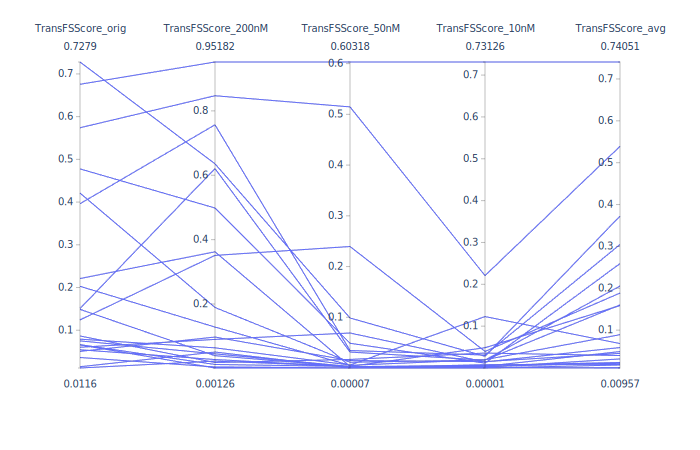

In [52]:
fig = px.parallel_coordinates(merged,
                dimensions=['TransFSScore_orig', 'TransFSScore_200nM', 'TransFSScore_50nM', 'TransFSScore_10nM', 'TransFSScore_avg']
            )
fig.show(renderer='svg')

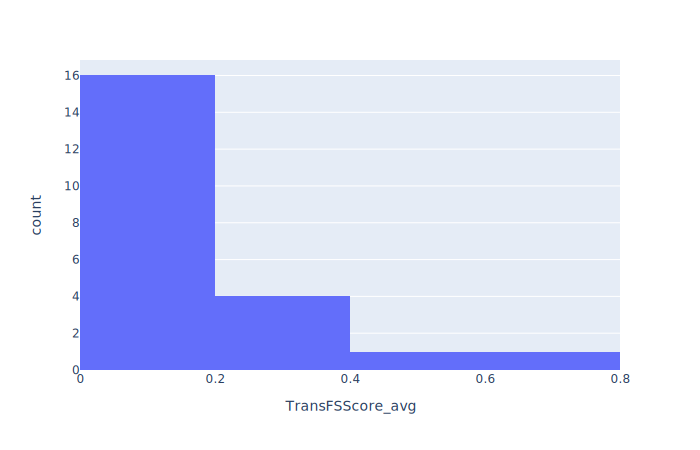

In [53]:
fig = px.histogram(merged, x="TransFSScore_avg")
fig.show(renderer='svg')